In [2]:
import pickle as pk
import numpy as np
import pandas as pd
from dateutil import relativedelta
from dateutil.parser import parse
import matplotlib.pyplot as plt
import statistics
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
# projection
import umap

In [3]:
subreddits = ['AdviceAnimals', 'AmItheAsshole', 'Android', 'AskMen', 'Bitcoin', 'Buddhism', 'CFB', 'Christianity', 'DebateReligion', 'Diablo', 'Drugs', 'Economics', 'Fitness', 'Frugal', 'Games', 'IAmA', 'Judaism', 'LifeProTips', 'MMA', 'MakeupAddiction', 'Marvel', 'MensRights', 'Minecraft', 'Music', 'Naruto', 'Random_Acts_Of_Amazon', 'ShingekiNoKyojin', 'SquaredCircle', 'WTF', 'anime', 'apple', 'atheism', 'australia', 'baseball', 'books', 'business', 'canada', 'cars', 'conspiracy', 'cringe', 'cringepics', 'dayz', 'electronic_cigarette', 'explainlikeimfive', 'fantasyfootball', 'funny', 'gaming', 'gifs', 'guns', 'hiphopheads', 'hockey', 'leagueoflegends', 'magicTCG', 'malefashionadvice', 'motorcycles', 'movies', 'nba', 'news', 'nfl', 'photography', 'pics', 'pokemontrades', 'politics', 'programming', 'relationship_advice', 'relationships', 'science', 'sex', 'singapore', 'skyrim', 'snowboarding', 'soccer', 'technology', 'techsupport', 'teenagers', 'tennis', 'tf2', 'tifu', 'todayilearned', 'travel', 'trees', 'unitedkingdom', 'videos', 'worldnews']

coef_df = pd.DataFrame()

for subreddit in subreddits:
    dist_params = pk.load(open(f"data/output/regression/{subreddit}-emb_params-W.pk", "rb"))
    df = pd.DataFrame(dist_params)
    df['subreddit'] = subreddit
    df = df[~df['variable'].str.contains("month_1")]
    coef_df = pd.concat((coef_df, df))


coef_df = coef_df[coef_df['variable'].isin(['C(n_months)[T.1]', 'C(n_months)[T.2]',
       'C(n_months)[T.3]', 'C(n_months)[T.4]', 'C(n_months)[T.5]',
       'C(n_months)[T.6]', 'C(n_months)[T.7]', 'C(n_months)[T.8]',
       'C(n_months)[T.9]', 'C(n_months)[T.10]', 'C(n_months)[T.11]',
       'C(n_months)[T.12]'])]

mean_coef = coef_df.groupby(['subreddit', 'variable']).mean().reset_index()
x = pd.pivot_table(mean_coef, index='subreddit', columns='variable',values='coefficient')

96

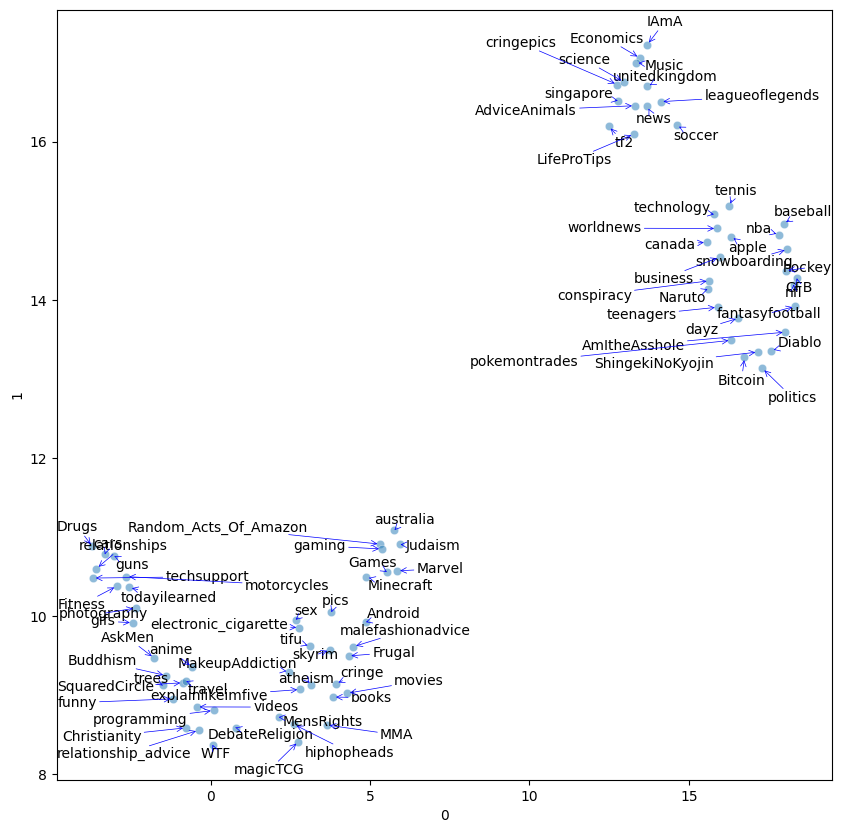

In [11]:
method = umap.UMAP(n_components=2, n_neighbors=8, min_dist=0.3)
projection = method.fit_transform(x.values)

proj_df = pd.DataFrame(projection)
proj_df['subreddit'] = x.index

plt.figure(figsize=(10, 10))
sns.scatterplot(data=proj_df, x=0, y=1, alpha=0.5)

texts = []
for r in proj_df.to_dict(orient='records'):
    texts.append(plt.text(r[0], r[1], r['subreddit']))
    
adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, 
            autoalign='y',
            arrowprops=dict(arrowstyle="->", color='b', lw=0.5)
           )

184

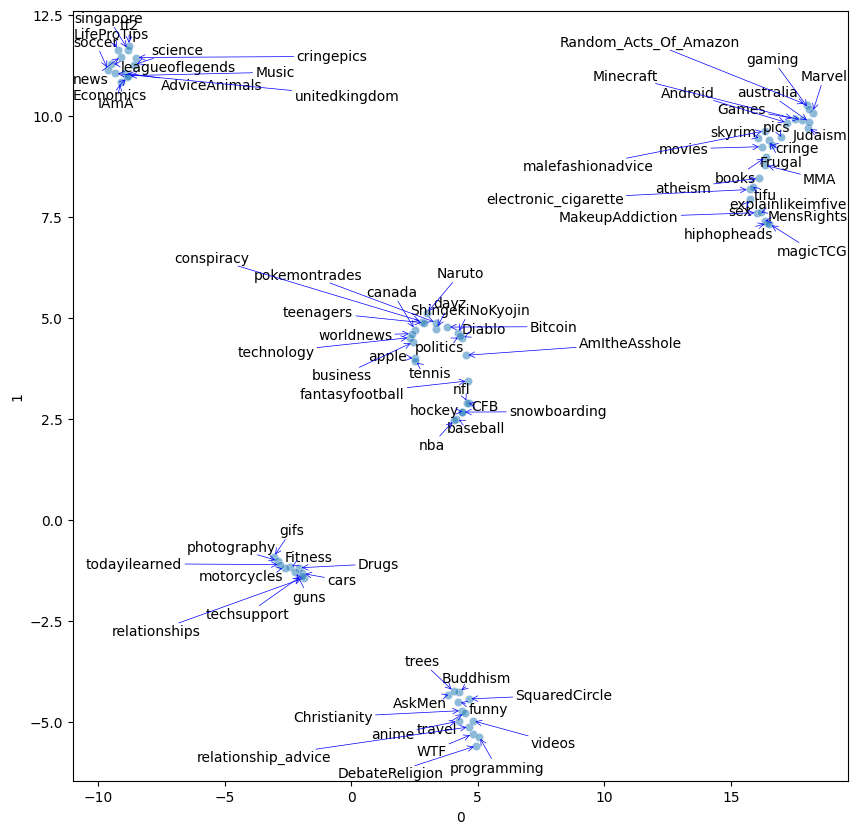

In [8]:
method = umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.1)
projection = method.fit_transform(x.values)

proj_df = pd.DataFrame(projection)
proj_df['subreddit'] = x.index

plt.figure(figsize=(10, 10))
sns.scatterplot(data=proj_df, x=0, y=1, alpha=0.5)

texts = []
for r in proj_df.to_dict(orient='records'):
    texts.append(plt.text(r[0], r[1], r['subreddit']))
    
adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, 
            autoalign='y',
            arrowprops=dict(arrowstyle="->", color='b', lw=0.5)
           )

In [13]:
from sklearn.manifold import TSNE

/home/aww66/.conda/envs/huggingface/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


500

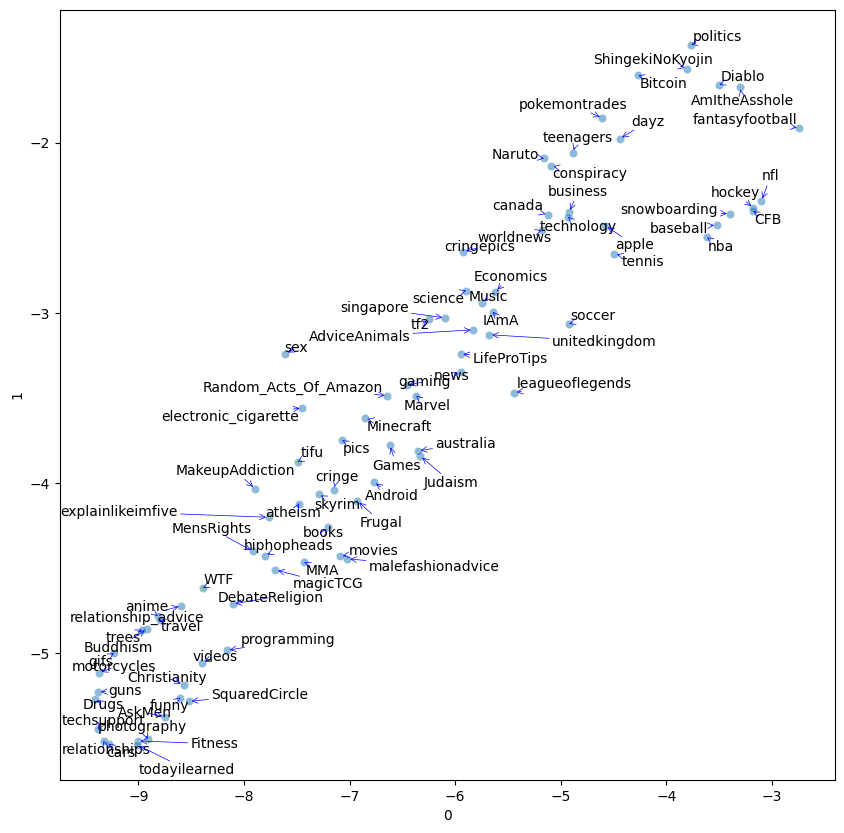

In [17]:
method = TSNE(n_components=2, perplexity=45, init='random')
projection = method.fit_transform(x.values)

proj_df = pd.DataFrame(projection)
proj_df['subreddit'] = x.index

plt.figure(figsize=(10, 10))
sns.scatterplot(data=proj_df, x=0, y=1, alpha=0.5)

texts = []
for r in proj_df.to_dict(orient='records'):
    texts.append(plt.text(r[0], r[1], r['subreddit']))
    
adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, 
            autoalign='y',
            arrowprops=dict(arrowstyle="->", color='b', lw=0.5)
           )

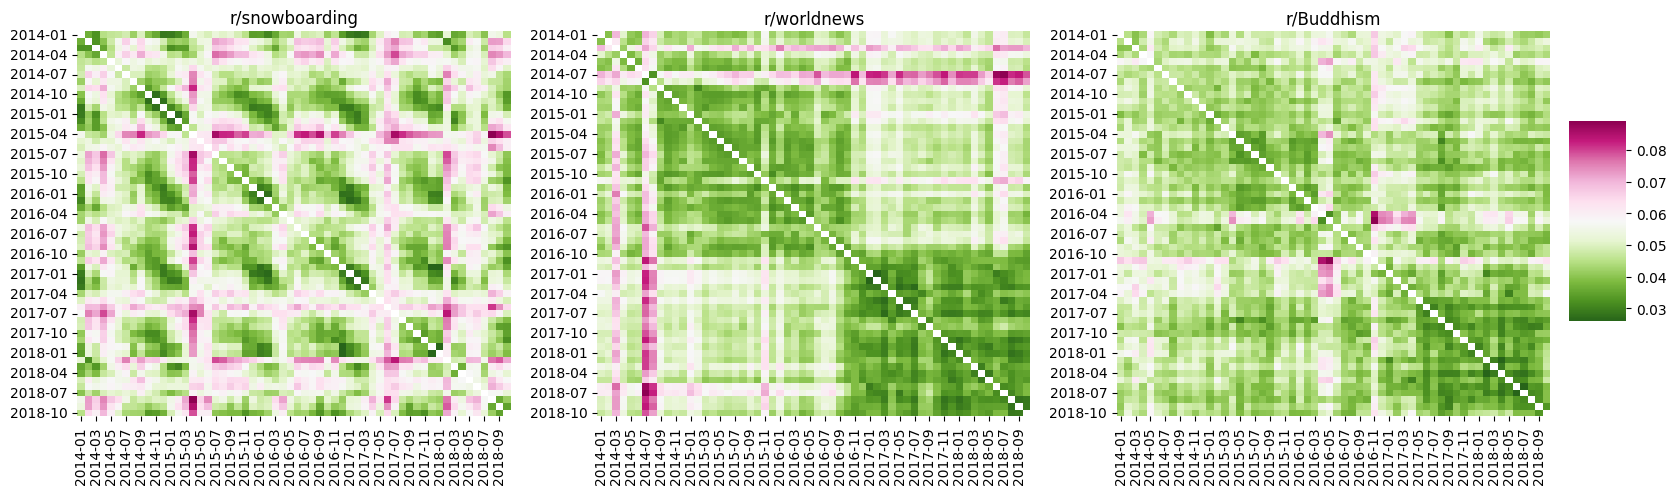

In [4]:
# plot heatmap
subreddit = 'Buddhism'


fig, axes = plt.subplots(
    1, 3, figsize=(19, 5),
#     sharey=True
                        )

cbar_ax = fig.add_axes([.91, .3, .03, .4])
subreddits = ['snowboarding', 'worldnews', 'Buddhism']
for i, ax in enumerate(axes.flat):
    subreddit = subreddits[i]
    (months, dist_stash) = pk.load(open(f"data/output/distances/{subreddit}-emb-I.pk", "rb"))
    mean_stash = dist_stash.mean(axis=0)
    mean_stash[mean_stash == 0] = np.nan
    dist = pd.DataFrame(mean_stash, index=months)
    dist.columns = months

    ax = sns.heatmap(dist, ax=ax,
                cbar=i == 0,
                cbar_ax=None if i else cbar_ax, cmap='PiYG_r')
    
    ax.set_title(f"r/{subreddit}")
plt.savefig(f"./figures/ic2s2-fig1.jpg", bbox_inches='tight')

# fig.suptitle(f"r/{args.subreddit}")
# mean_stash = dist_stash.mean(axis=0)
# mean_stash[mean_stash == 0] = np.nan
# dist = pd.DataFrame(mean_stash, index=months)
# dist.columns = months
# sns.heatmap(dist, cmap='PiYG', ax=axes[0])
# axes[0].set_title(f"Euclidean distance")

In [19]:
def plot_O_params(subreddit):
    dist_params = pk.load(open(f"data/output/regression/{subreddit}-emb_params-O.pk", "rb"))
    df = pd.DataFrame(dist_params)
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    fig.suptitle(f"r/{subreddit} regression, output = embedding distance")
    ax = sns.boxplot(data=df, x='variable', y='coefficient', ax=axes[0])
    ax.set_title("coefficients")

    ax = sns.boxplot(data=df, x='variable', y='pvalue', ax=axes[1])
    ax.set_title(f"p values")
    ax.axhline(0.05, color='red', label='p = 0.05')
    plt.legend()

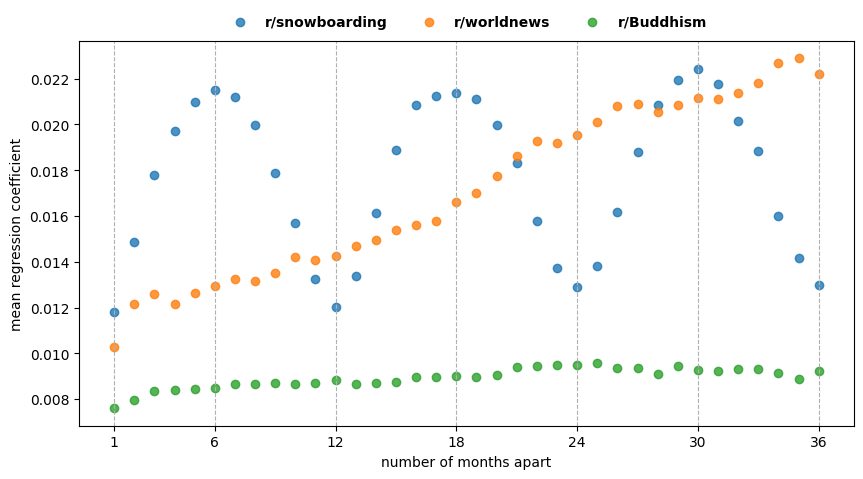

In [7]:
plt.figure(figsize=(10, 5))
for i, subreddit in enumerate(['snowboarding', 'worldnews', 'Buddhism']):

    dist_params = pk.load(open(f"data/output/regression/{subreddit}-emb_params-W.pk", "rb"))
    df = pd.DataFrame(dist_params)
    df = df[df['variable'].str.contains("n_months")]
    df['variable_value'] = df['variable'].apply(lambda s: s.split("T.")[-1].split("]")[0])
    df = df.rename({"variable_value": "n_months"}, axis=1)
    df = df.drop("variable", axis=1)
    df['subreddit'] = subreddit
    df['n_months'] = df['n_months'].astype(int)
    g = df.groupby(['n_months'])['coefficient'].mean().reset_index()
    ax = sns.regplot(data=g, x='n_months', y='coefficient', label=f"r/{subreddit}", fit_reg=False)
ax.set_xticks([1, 6, 12, 18, 24, 30, 36])

plt.grid(axis="x", linestyle="--")
plt.xlabel("number of months apart")
plt.ylabel("mean regression coefficient")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize="medium", frameon=False, ncol=3, 
          prop={"weight": "bold"})

plt.savefig(f"./figures/ic2s2-fig2.jpg", bbox_inches='tight')

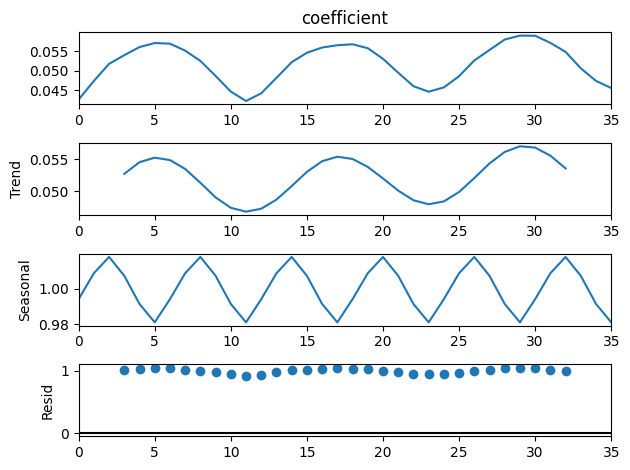

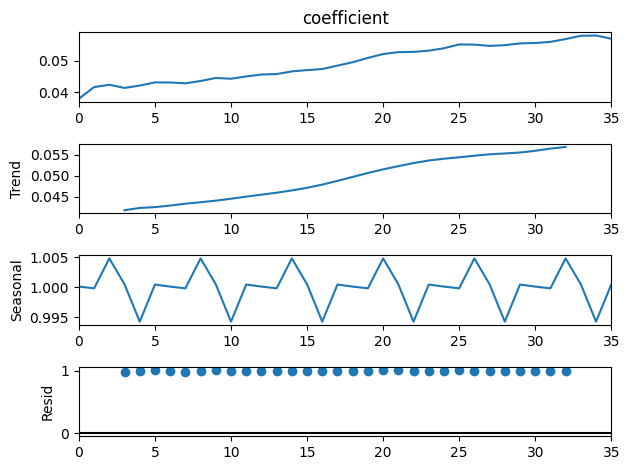

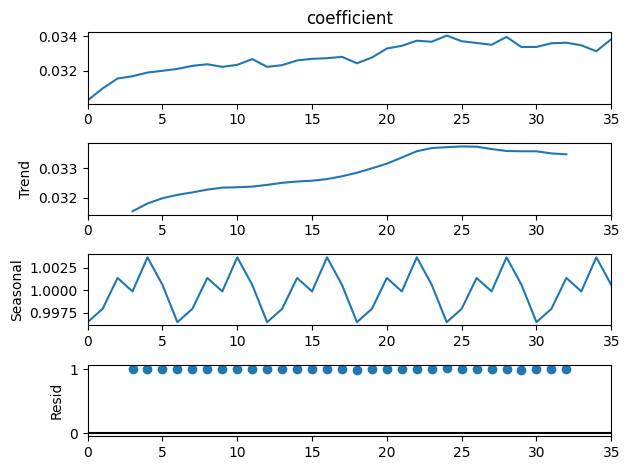

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
for i, subreddit in enumerate(['snowboarding', 'worldnews', 'Buddhism']):

    dist_params = pk.load(open(f"data/output/regression/{subreddit}-emb_params-I.pk", "rb"))
    df = pd.DataFrame(dist_params)
    df = df[df['variable'].str.contains("n_months")]
    df['variable_value'] = df['variable'].apply(lambda s: s.split("T.")[-1].split("]")[0])
    df = df.rename({"variable_value": "n_months"}, axis=1)
    df = df.drop("variable", axis=1)
    df['subreddit'] = subreddit
    df['n_months'] = df['n_months'].astype(int)
    g = df.groupby(['n_months'])['coefficient'].mean().reset_index()
    seasonal_decomp = seasonal_decompose(g['coefficient'], model="multiplicative", period=6)
    seasonal_decomp.plot();

In [24]:
def plot_II_params(subreddit):
    dist_params = pk.load(open(f"data/output/regression/{subreddit}-emb_params-II.pk", "rb"))
    df = pd.DataFrame(dist_params)
    df = df[df['variable'].str.contains("same")]
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    fig.suptitle(f"r/{subreddit} regression, output = embedding distance")
    ax = sns.boxplot(data=df, x='variable', y='coefficient', ax=axes[0])
    ax.set_title("coefficients")

    ax = sns.boxplot(data=df, x='variable', y='pvalue', ax=axes[1])
    ax.set_title(f"p values")
    ax.axhline(0.05, color='red', label='p = 0.05')
    plt.legend()

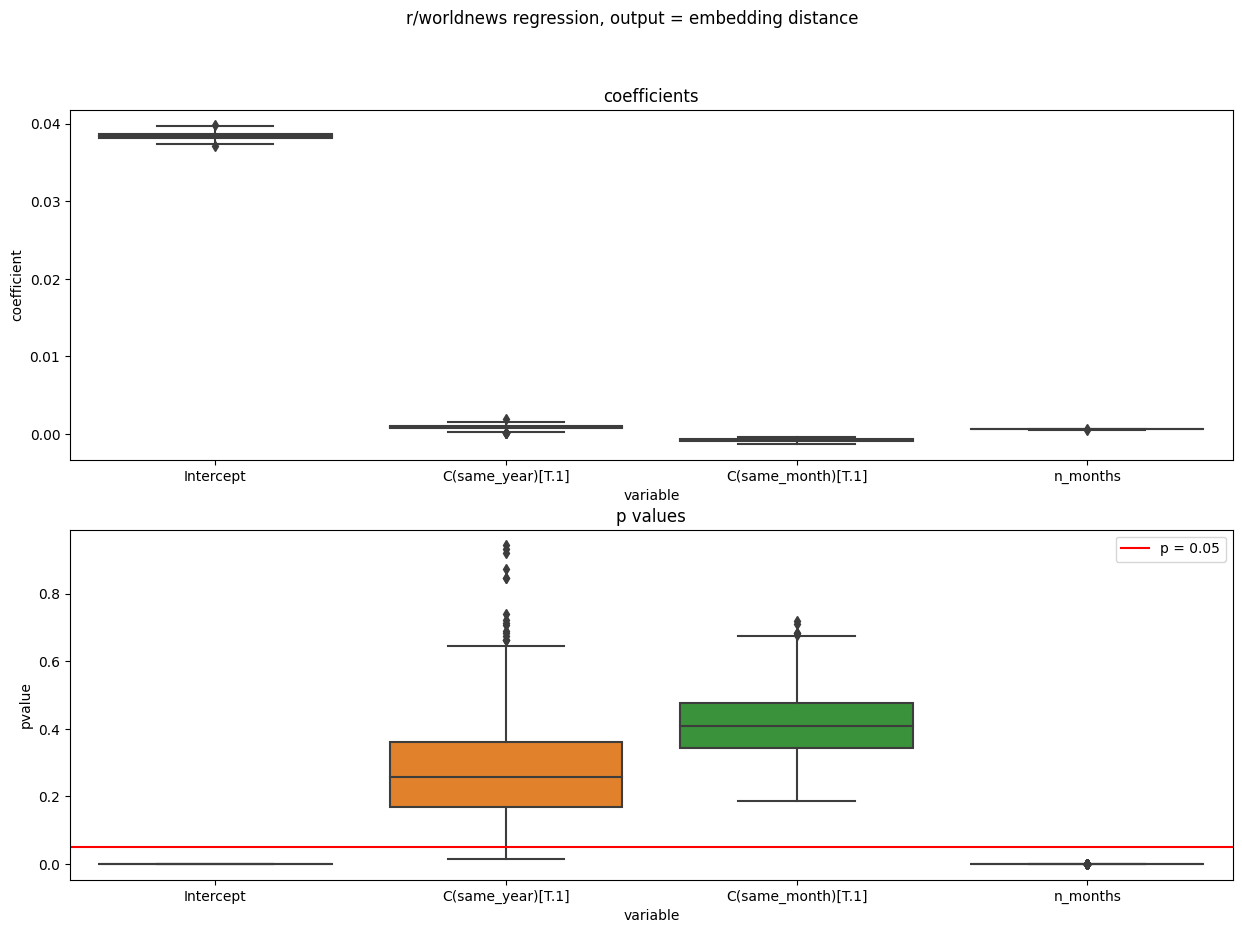

In [21]:
plot_O_params("worldnews")

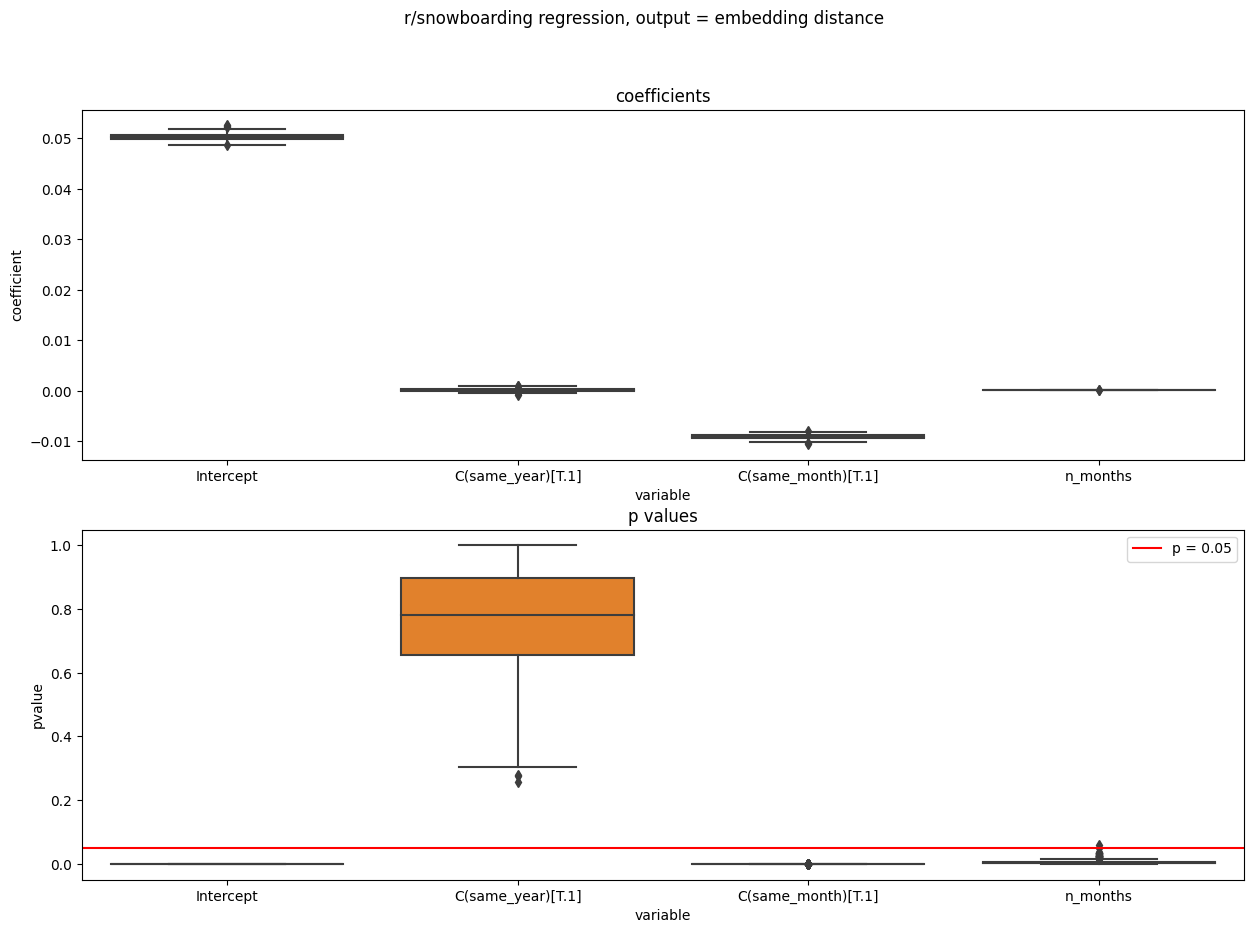

In [26]:
plot_O_params("snowboarding")

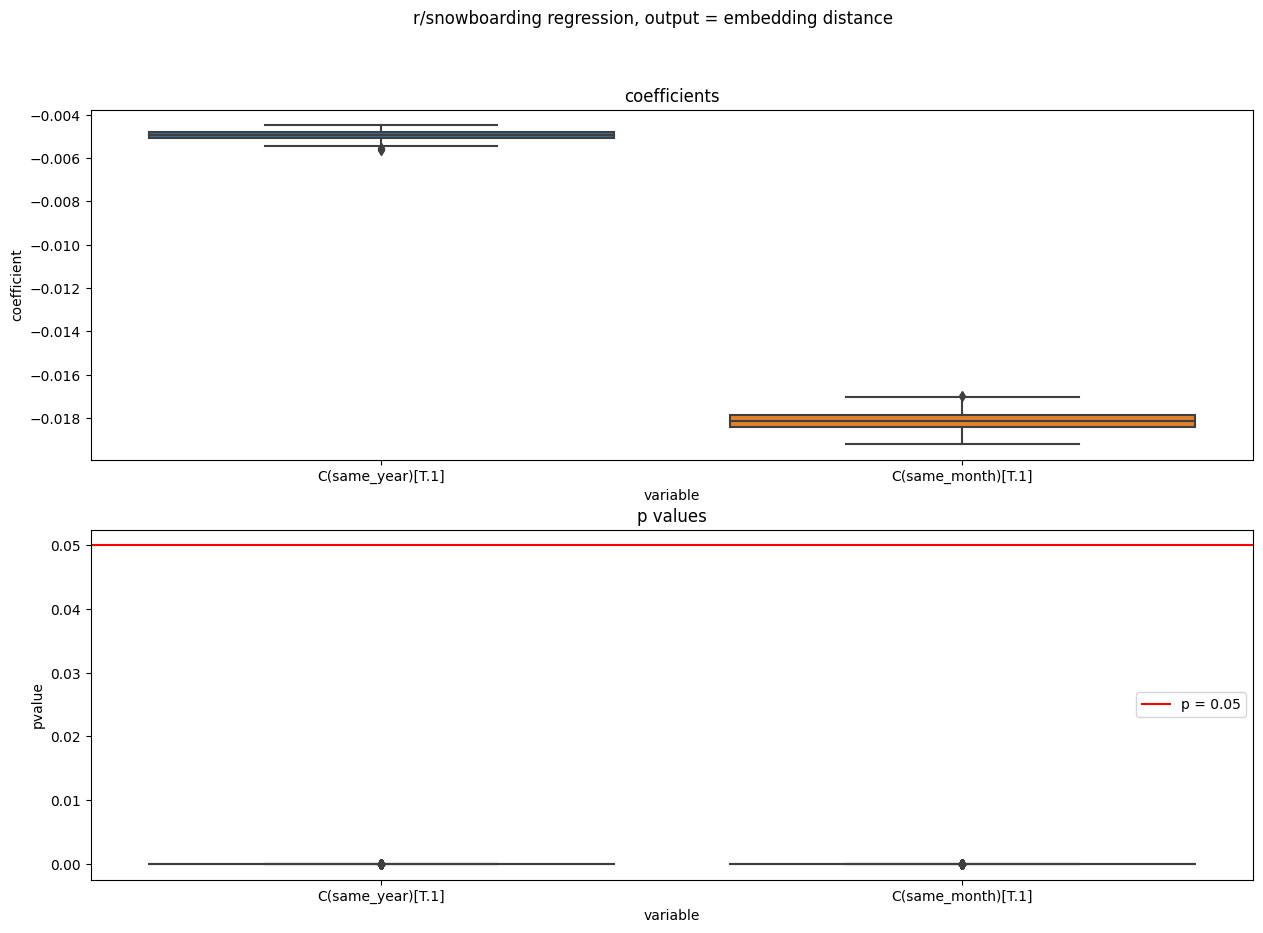

In [27]:
plot_II_params("snowboarding")

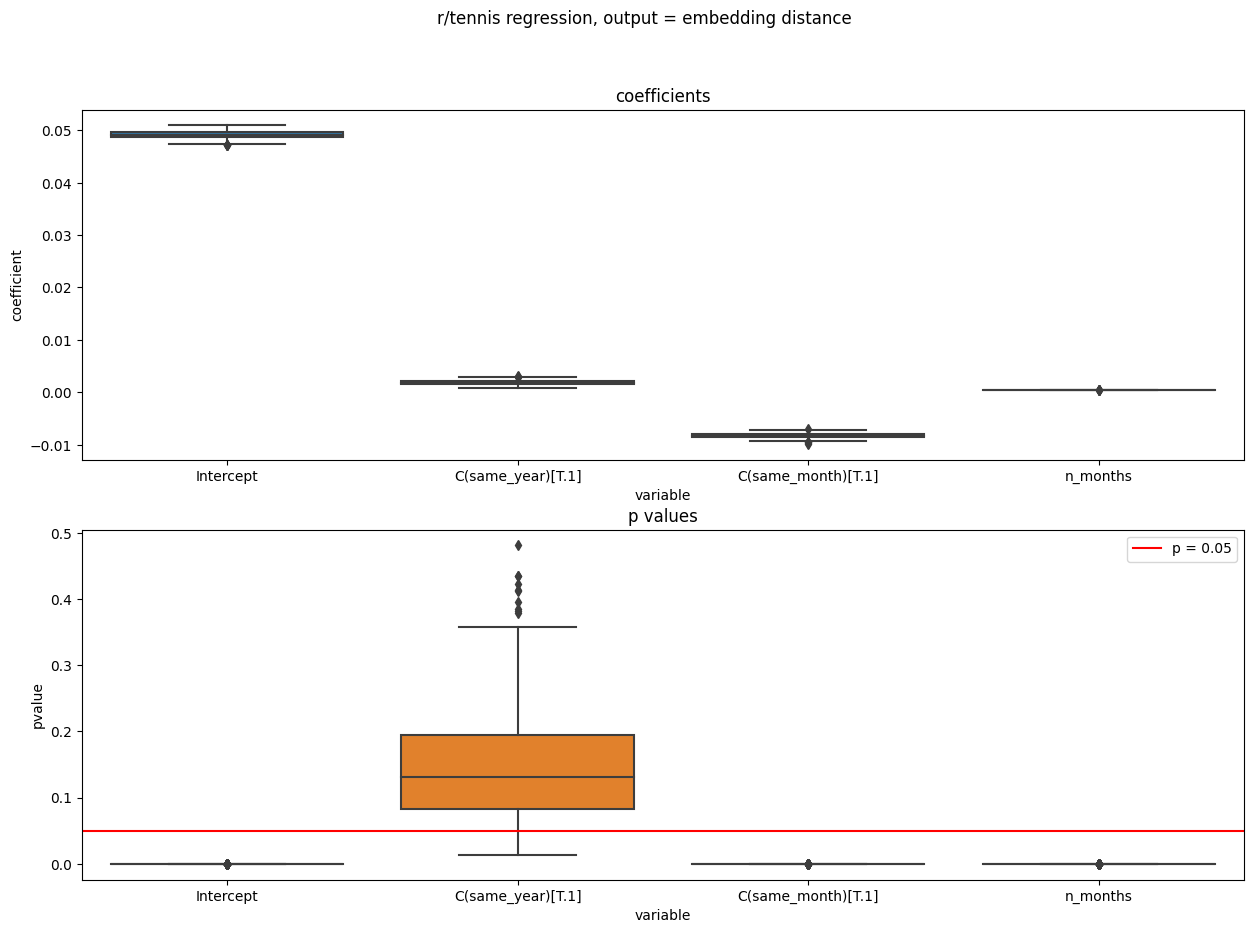

In [28]:
plot_O_params("tennis")

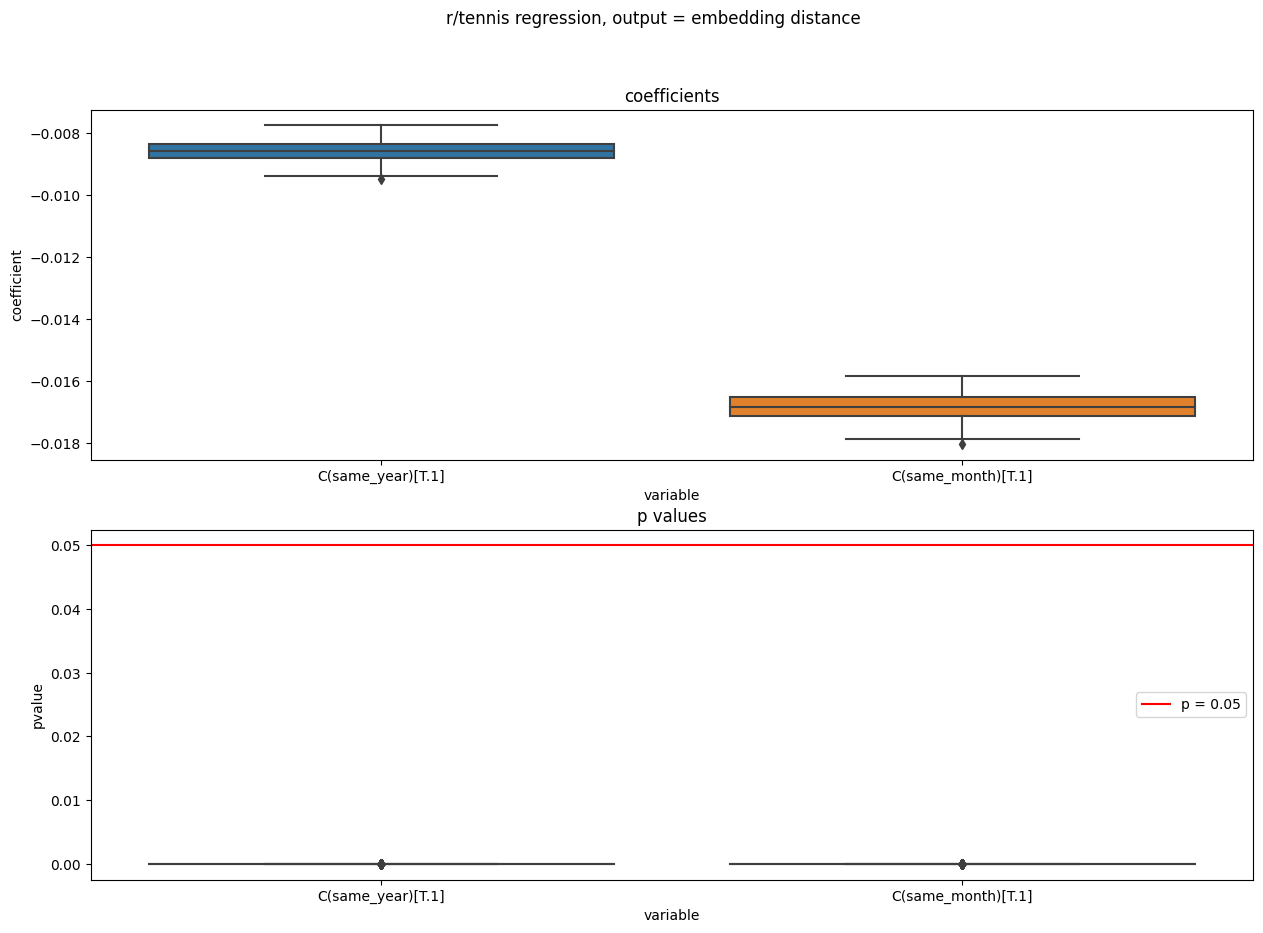

In [29]:
plot_II_params("tennis")

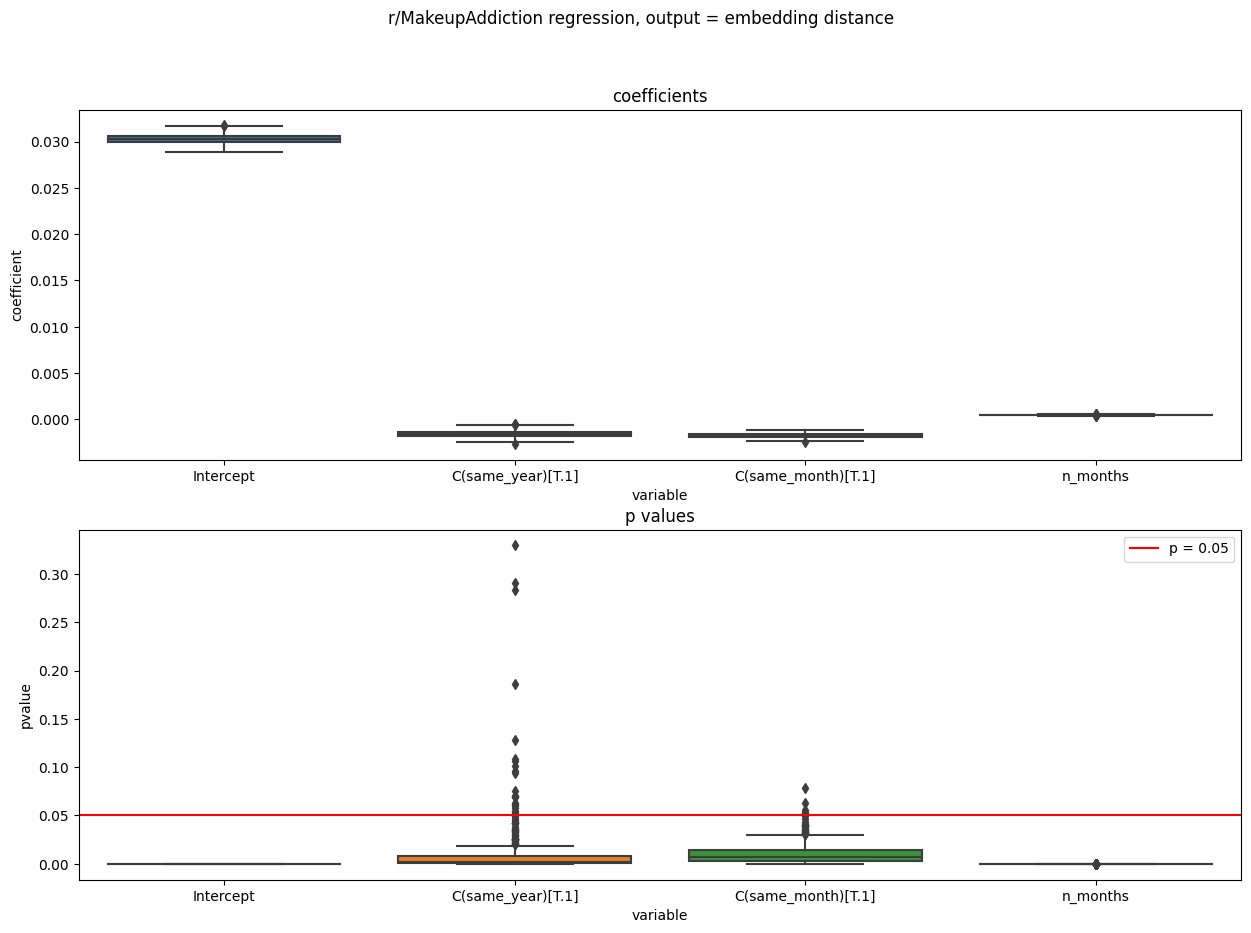

In [30]:
plot_O_params("MakeupAddiction")

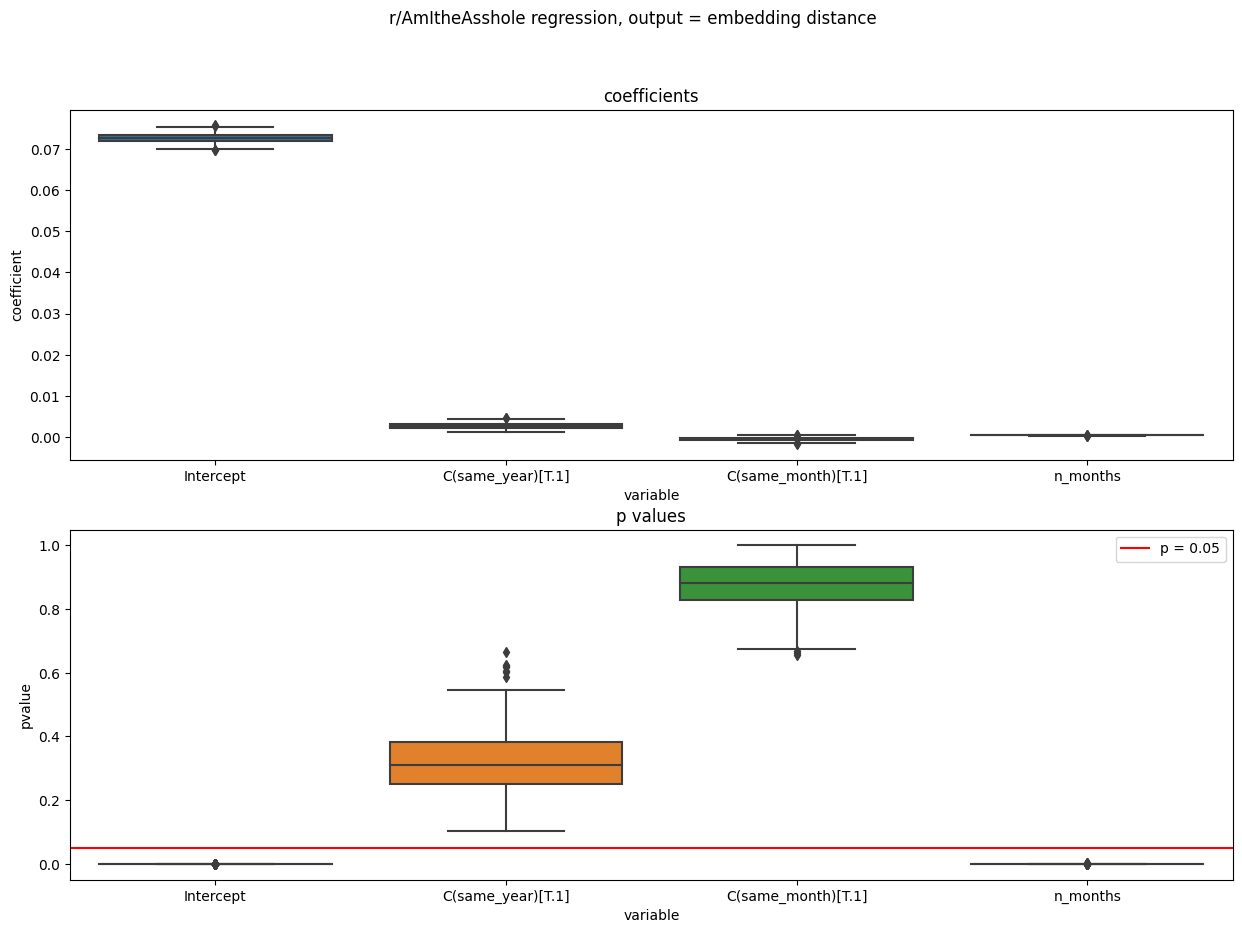

In [17]:
plot_params("AmItheAsshole")

In [32]:
subreddits = "AdviceAnimals AmItheAsshole Android AskMen Bitcoin Buddhism CFB Christianity DebateReligion Diablo Drugs Economics Fitness Frugal Games IAmA Judaism LifeProTips MMA MakeupAddiction Marvel MensRights Minecraft Music Naruto Random_Acts_Of_Amazon ShingekiNoKyojin SquaredCircle WTF anime apple atheism australia baseball books business canada cars conspiracy cringe cringepics dayz electronic_cigarette explainlikeimfive fantasyfootball funny gaming gifs guns hiphopheads hockey leagueoflegends magicTCG malefashionadvice motorcycles movies nba news nfl photography pics pokemontrades politics programming relationship_advice relationships science sex singapore skyrim snowboarding soccer technology techsupport teenagers tennis tf2 tifu todayilearned travel trees unitedkingdom videos worldnews"
subreddits = subreddits.split(" ")


In [34]:
len(subreddits)

84

In [48]:
stash = dict()
df = pd.DataFrame()
for subreddit in subreddits:
    try:
        params = pk.load(open(f"data/output/regression/{subreddit}-emb_params-II.pk", "rb"))
    except:
        continue
    one_subreddit = pd.DataFrame(params)
    one_subreddit['subreddit'] = subreddit
    df = pd.concat((df, one_subreddit))
    

In [49]:
df['subreddit'].nunique()

84

In [50]:
g = df.groupby(["subreddit", "variable"])['coefficient'].mean().reset_index()

In [51]:
g = g.pivot(index='subreddit', columns='variable', values='coefficient')

In [52]:
g

variable,C(month_1_month)[T.02],C(month_1_month)[T.03],C(month_1_month)[T.04],C(month_1_month)[T.05],C(month_1_month)[T.06],C(month_1_month)[T.07],C(month_1_month)[T.08],C(month_1_month)[T.09],C(month_1_month)[T.10],C(month_1_month)[T.11],C(month_1_month)[T.12],C(month_1_year)[T.2015],C(month_1_year)[T.2016],C(month_1_year)[T.2017],C(month_1_year)[T.2018],C(same_month)[T.1],C(same_year)[T.1],Intercept
subreddit,,,,,,,,,,,,,,,,,,
AdviceAnimals,0.000474,-0.001943,-0.001118,-0.000406,0.000791,0.001574,0.000823,0.001364,0.001591,0.008653,0.004405,0.003124,0.007772,0.013937,0.017722,-0.008873,-0.010295,0.039929
AmItheAsshole,-0.011008,-0.012437,-0.006943,-0.008425,-0.014693,-0.014961,-0.012016,-0.015640,-0.012661,-0.017349,-0.021186,-0.037492,-0.049068,-0.057602,-0.076587,-0.016477,-0.011618,0.139781
Android,-0.001989,-0.001700,-0.002060,-0.000974,-0.001858,-0.002297,-0.001283,0.000573,0.002909,-0.000962,-0.001185,-0.002984,-0.001986,-0.002984,-0.002639,-0.009151,-0.008500,0.045785
AskMen,0.000125,-0.000180,-0.000717,-0.001246,-0.000825,-0.000879,-0.001137,-0.000321,-0.001538,-0.001506,-0.001504,-0.002327,-0.002391,-0.003003,-0.004227,-0.006416,-0.006313,0.037884
Bitcoin,0.004487,0.007473,0.004058,0.003717,0.000283,0.000246,0.004127,0.002262,-0.000024,0.009179,0.001761,-0.002023,0.003084,0.002449,0.002339,-0.008891,-0.017020,0.054381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
travel,0.000410,-0.000398,-0.000705,0.000020,0.000883,-0.000928,-0.000864,0.000704,0.000897,0.000131,0.000362,-0.001305,-0.001983,-0.001927,-0.002480,-0.007099,-0.006930,0.037947
trees,-0.000896,-0.001631,-0.001029,-0.000683,-0.001201,-0.001220,-0.001373,0.000395,0.000153,0.002850,-0.000903,-0.000149,0.001856,0.000786,0.001993,-0.006819,-0.005202,0.033639
unitedkingdom,-0.000428,0.000198,0.001642,0.001759,0.008787,0.000797,-0.001456,-0.001217,-0.002708,-0.001872,-0.002919,-0.003225,-0.003374,-0.004706,-0.008721,-0.009302,-0.007219,0.049344


223

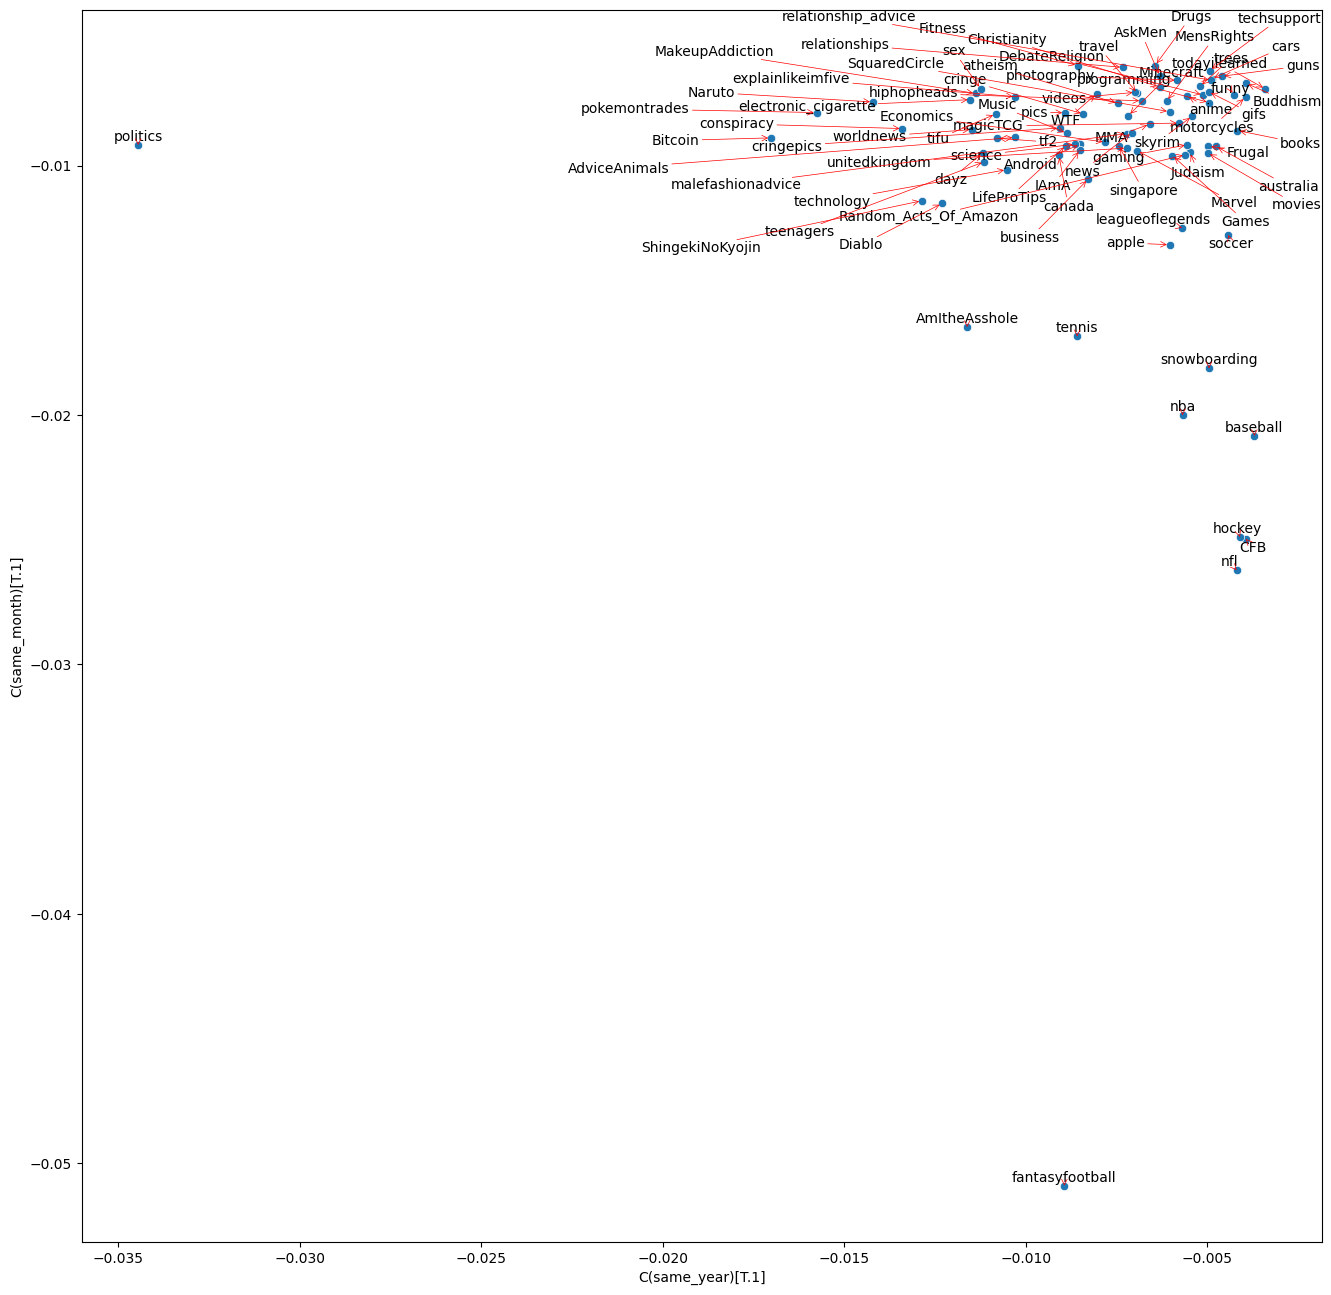

In [53]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(16, 16))
axis1 = "C(same_year)[T.1]"
axis2 = "C(same_month)[T.1]"
sns.scatterplot(data = g, x=axis1, y =axis2)

texts = []
for x, y, s in zip(g[axis1], g[axis2], g.index):
    texts.append(plt.text(x, y, s))
    
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, 
            autoalign='y',
            arrowprops=dict(arrowstyle="->", color='r', lw=0.5))